In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


rfm = pd.read_csv(r'C:\Users\hp\Desktop\RFM_analysis\rfm_segments.csv')

X = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

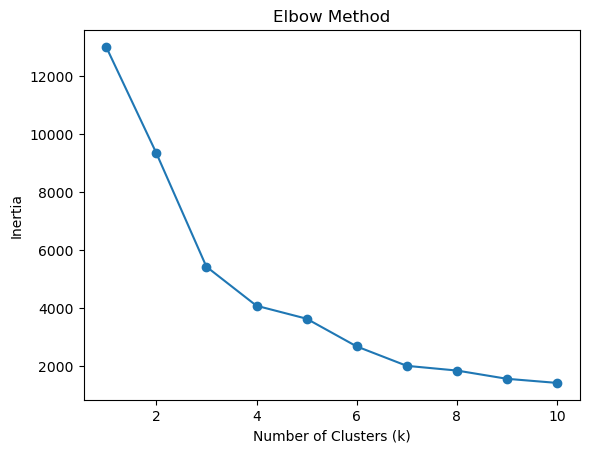

In [3]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [5]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

            Recency  Frequency       Monetary
Cluster                                      
0         15.672986  22.047393   12453.225924
1        248.564030   1.551789     478.107581
2          7.384615  82.692308  127338.313846
3         43.910580   3.655748    1349.698298


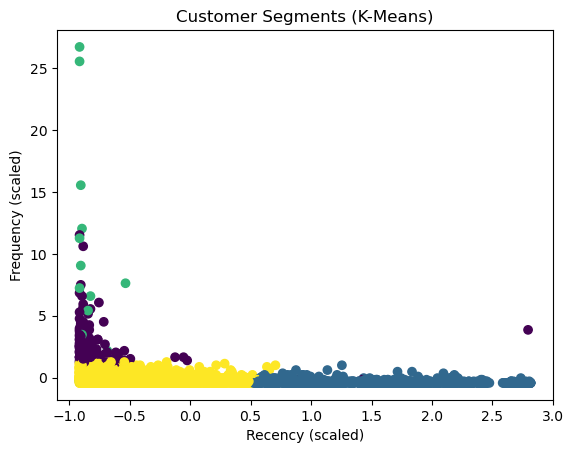

In [9]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=rfm['Cluster'])
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.title('Customer Segments (K-Means)')
plt.show()

In [10]:
rfm.to_csv('customer_segments_kmeans.csv', index=False)